In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

In [52]:
# check the volume distribution in dHCP
# Compute AUC on preterm task using volume

# Use brain hull volume

labels_dir = '/neurospin/dico/jlaval/data/labels_dHCP.csv'
df_labels = pd.read_csv(labels_dir, sep=',')
names = df_labels['Subject'].tolist()[:-37] # Only use the new dHCP data
labels = df_labels['Preterm'].tolist()[:-37]
birth_ages = df_labels['birth_age'].tolist()[:-37]
scan_ages = df_labels['scan_age'].tolist()[:-37]


volume_dHCP = {}
for subject in names:
    dir_arg_1 = f'/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho/dHCP/{subject}/t1mri/default_acquisition/default_analysis/folds/3.1/R{subject}.arg'
    if os.path.isfile(dir_arg_1):
        with open(dir_arg_1, 'r') as file:
            data = file.read()
            volume = int(data.split('\n')[19].split(' ')[-1])
            volume_dHCP[subject]=volume
    else:
        print(f'no arg file for subject {subject}')

In [57]:
preterm_volumes = []
preterm_scan_age = []
full_term_volumes = []
full_term_scan_age = []
for idx, subject in enumerate(names):
    volume = volume_dHCP[subject]
    label = labels[idx]
    scan_age = scan_ages[idx]
    if label:
        preterm_volumes.append(volume)
        preterm_scan_age.append(scan_age)
    else:
        full_term_volumes.append(volume)
        full_term_scan_age.append(scan_age)

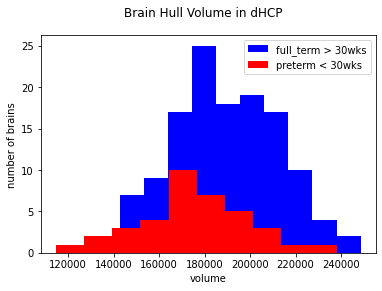

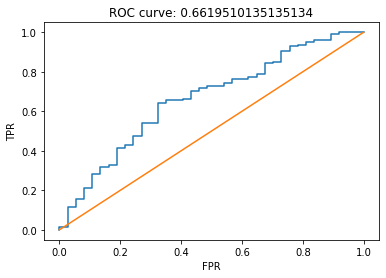

In [62]:
# AUC on volume

fig, ax = plt.subplots()
plt.hist(full_term_volumes, color='b', label='full_term > 30wks')
plt.hist(preterm_volumes, color='r', label='preterm < 30wks')
plt.suptitle('Brain Hull Volume in dHCP')
plt.xlabel('volume')
plt.ylabel('number of brains')
plt.legend()
plt.show()

# Compute AUC
volumes = [volume_dHCP[name] for name in names]
fpr, tpr, thresholds = metrics.roc_curve(labels, volumes, pos_label=0)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC curve: {auc}')
plt.show()

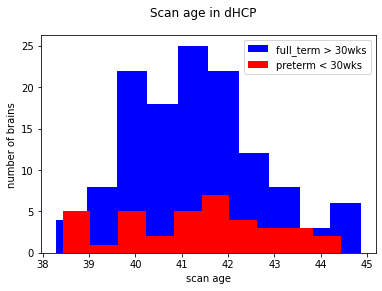

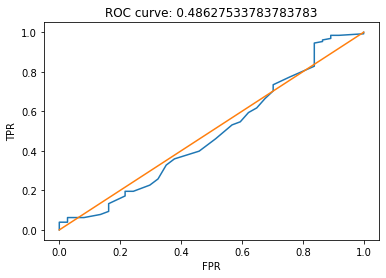

In [65]:
# AUC on scan age to avoid confusion factor

fig, ax = plt.subplots()
plt.hist(full_term_scan_age, color='b', label='full_term > 30wks')
plt.hist(preterm_scan_age, color='r', label='preterm < 30wks')
plt.suptitle('Scan age in dHCP')
plt.xlabel('scan age')
plt.ylabel('number of brains')
plt.legend()
plt.show()

# Compute AUC
fpr, tpr, thresholds = metrics.roc_curve(labels, scan_ages, pos_label=0)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'ROC curve: {auc}')
plt.show()

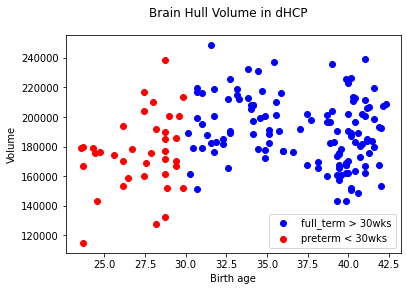

In [5]:
# Represent a point cloud depending on birth age
birth_age_preterm = []
birth_age_full_term = []
for label, birth_age in zip(labels, birth_ages):
    if label:
        birth_age_preterm.append(birth_age)
    else:
        birth_age_full_term.append(birth_age)

fig, ax = plt.subplots()
plt.scatter(birth_age_full_term,full_term_volumes, color='b', label='full_term > 30wks')
plt.scatter(birth_age_preterm, preterm_volumes, color='r', label='preterm < 30wks')
plt.suptitle('Brain Hull Volume in dHCP')
plt.xlabel('Birth age')
plt.ylabel('Volume')
plt.legend()
plt.show()

## SCAN AGE / VOLUME ANALYSIS

In [6]:
# Fit the power function to the data
def fit_power(x, y, estimation=(150000, 1.08)):

    mini = np.min(x)
    x = np.array(x)
    x_centered = x - np.min(x)
    y = np.array(y)
    popt, pcov = curve_fit(lambda t, a, b: a * b**t, x_centered, y, p0=estimation)

    # apply fitted f
    x_fitted = np.linspace(np.min(x), np.max(x), 100)
    x_fitted_centered = x_fitted - np.min(x_fitted)
    a = popt[0]
    b = popt[1]
    y_fitted = a * b**x_fitted_centered

    return({'offset': a,
            'growth': b,
            'x_fitted': x_fitted,
            'y_fitted': y_fitted})

In [50]:
## Volumes computed using brain_hull_volume

# just need the volume for old dHCP dataset
# add old dHCP release volume
volume_dHCP = []
dir_names = '/neurospin/dico/data/deep_folding/current/datasets/utrecht_dHCP/crops/2mm/CINGULATE_40wks/mask/Rskeleton_subject.csv'
names = pd.read_csv(dir_names)['Subject'].tolist()
for subject in names[71:]:
    dir_arg = '/neurospin/dico/data/bv_databases/dHCP/neurospin/grip/external_databases/dHCP_CR_JD_2018/release1/subjects/dHCP_release1/'+subject+'/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_manual/R'+subject+'_default_session_manual.arg'
    if os.path.isfile(dir_arg):
        with open(dir_arg, 'r') as file:
            data = file.read()
            volume = int(data.split('\n')[20].split(' ')[-1])
            volume_dHCP.append(volume)
    else:
        print(subject)
        
# load age file
ages = pd.read_csv('/home/jl274628/Documents/scan_age.csv')
age_list = ages['scan_age'].tolist()
age_dHCP = age_list[71:]

save_dir = '/home/jl274628/Images/dHCP_brain_hull_volumes_40_45.jpg'
title = 'Brain Hull volume in dHCP'

kt090312


In [329]:
## Volumes computed using WM + GM + ventricles

# dHCP release 3
labels_dir = '/neurospin/dico/jlaval/data/labels_dHCP.csv'
df_labels = pd.read_csv(labels_dir, sep=',')
names = df_labels['Subject'].tolist()[:-37] # Only use the new dHCP data
load_dir = '/neurospin/dico/jlaval/data/'
volume_dHCP_df = pd.read_csv(load_dir+'full_volumes_dHCP_165_subjects.csv')
# filter for the 165 subjects
volume_dHCP = []
for name in names:
    volume_dHCP.append(volume_dHCP_df.loc[volume_dHCP_df['Subject']==name]['Volume'].tolist()[0])

# Split in Preterm / full term
preterm_volumes = []
full_term_volumes = []
for idx, label in enumerate(labels):
    volume = volume_dHCP[idx]
    if label:
        preterm_volumes.append(volume)
    else:
        full_term_volumes.append(volume)

# dHCP old release
names = df_labels['Subject'].tolist()[-37:] # Only use the new dHCP data
volume_dHCP_df = pd.read_csv(load_dir+'full_volumes_dHCP.csv')
volume_dHCP = []
age_dHCP = []
for name in names:
    volume_dHCP.append(volume_dHCP_df.loc[volume_dHCP_df['Subject'].str.contains(name)]['Volume'].tolist()[0])
    age_dHCP.append(df_labels.loc[df_labels['Subject']==name]['scan_age'].tolist()[0])

save_dir = '/home/jl274628/Images/dHCP_WM_GM_ventricles_volumes.jpg'
title = 'Volume as WM + GM + ventricle in dHCP'

In [11]:
preterm_volumes
scan_age_preterm = []
scan_age_full_term = []
for label, scan_age in zip(labels, scan_ages):
    if label:
        scan_age_preterm.append(scan_age)
    else:
        scan_age_full_term.append(scan_age)

In [47]:
## keep babies with scan 44 > age > 39 weeks and
df_preterm = pd.DataFrame({'scan age': scan_age_preterm,
              'volume': preterm_volumes})
df_full_term = pd.DataFrame({'scan age': scan_age_full_term,
                'volume': full_term_volumes})
df_old_dHCP = pd.DataFrame({'scan age': age_dHCP,
               'volume': volume_dHCP})

for df in [df_preterm, df_full_term, df_old_dHCP]:
    df.drop(df[(df['scan age'] < 40) | (df['scan age'] > 45)].index, inplace=True)

In [48]:
# fit power functions
estimation = (150000, 1.08)
# preterm
x = np.array(df_preterm['scan age'].tolist())
y = np.array(df_preterm['volume'].tolist())
dict_preterm = fit_power(x, y, estimation)

# full term
x = np.array(df_full_term['scan age'].tolist())
y = np.array(df_full_term['volume'].tolist())
dict_full_term = fit_power(x, y, estimation)

# old dHCP
x = np.array(df_old_dHCP['scan age'].tolist())
y = np.array(df_old_dHCP['volume'].tolist())
dict_old_dHCP = fit_power(x, y, estimation)

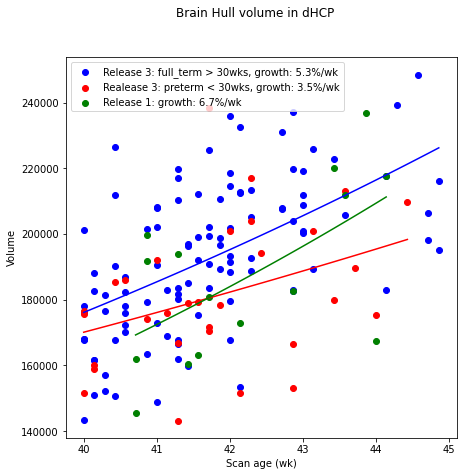

In [51]:
fig, ax = plt.subplots(figsize=(7,7))

x, y, growth = dict_full_term['x_fitted'], dict_full_term['y_fitted'], dict_full_term['growth']
plt.scatter(df_full_term['scan age'].tolist(), df_full_term['volume'].tolist(), color='b', label=f'Release 3: full_term > 30wks, growth: {(growth-1) * 100:.1f}%/wk')
plt.plot(x, y, color='b')

x, y, growth = dict_preterm['x_fitted'], dict_preterm['y_fitted'], dict_preterm['growth']
plt.scatter(df_preterm['scan age'].tolist(), df_preterm['volume'].tolist(), color='r', label=f'Realease 3: preterm < 30wks, growth: {(growth-1) * 100:.1f}%/wk')
plt.plot(x, y, color='r')

x, y, growth = dict_old_dHCP['x_fitted'], dict_old_dHCP['y_fitted'], dict_old_dHCP['growth']
plt.scatter(df_old_dHCP['scan age'].tolist(), df_old_dHCP['volume'].tolist(), color='g', label=f'Release 1: growth: {(growth-1) * 100:.1f}%/wk')
plt.plot(x, y, color='g')

plt.suptitle(title)
plt.xlabel('Scan age (wk)')
plt.ylabel('Volume')
plt.legend()
plt.savefig(save_dir, facecolor='white')
plt.show()